In [14]:
from ga import Population
from helper import *
from Individual import Individual

import pickle
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [15]:
# Create variables
x1 = np.linspace(-100, 100, 20)
x2 = np.linspace(-100, 100, 20)
data = np.stack([x1, x2], axis=1)

# Create target
y = 10*x1**3 + 4*x2**2

In [16]:
# Initialize population
num_individuals = 100
num_variables = 2
# Define ranges over which coefficients and exponents are randomly generated
coeff_min = 0
coeff_max = 10
exp_min = 0
exp_max = 4
operators = ['+','*']

individuals = Population.generate_individuals(num_individuals,
                                              num_variables,
                                              coeff_min, coeff_max,
                                              exp_min, exp_max, 
                                              operators)
d = Population(individuals, data, y)

In [17]:
# Assign number of cycles and begin training
fitnesses = []
MSE = []
num_cycles = 500
for i in tqdm(range(num_cycles)):
    d.cycle()
    best = d.get_best_func()
    fitnesses.append(best.get_fitness())
    diff = 0
    # Calculate MSE
    for i, row in enumerate(data):
        diff += (y[i] - best.calc_row(row))**2
    MSE.append(diff/len(y))
    #print(best)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:25<00:00, 20.00it/s]


Text(0, 0.5, 'Fitness')

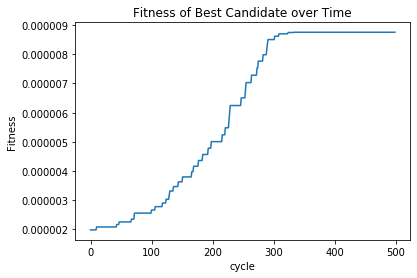

In [18]:
# View fitness scores over time
plt.plot(np.asarray(range(0, num_cycles)), fitnesses)
plt.title("Fitness of Best Candidate over Time")
plt.xlabel("cycle")
plt.ylabel("Fitness")

Text(0, 0.5, 'MSE')

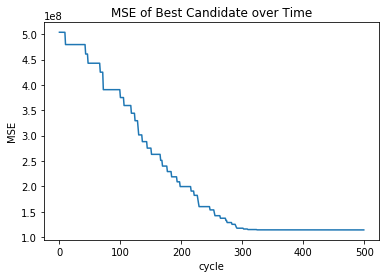

In [19]:
# View mean square errors over time
plt.plot(np.asarray(range(0, num_cycles)), MSE)
plt.title("MSE of Best Candidate over Time")
plt.xlabel("cycle")
plt.ylabel("MSE")

In [20]:
print(best)     #display best candidate function

4.0267568062428065*(x0)**2 + 9.975545697024168*(x1)**3 
